<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Testing-the-Best-Model" data-toc-modified-id="Testing-the-Best-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing the Best Model</a></span></li></ul></div>

<b>
<p>
<center>
<font size="5">
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>

<p>
<center>
<font size="4">
Part 3, Chapter 2, Section 2: Training Deep Neural Networks
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Homework 4
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Yuxiao Huang
</font>
</center>
</p>
</b>

# Overview

- This notebook includes homework 4 for Training Deep Neural Networks (Part 3, Chapter 2, Section 2).
- See the accompanied slides in our [github repository](https://github.com/yuxiaohuang/teaching/tree/master/gwu/machine_learning_I/fall_2022/slides/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s2_training_deep_neural_networks).
- Here we will work on TensorFlow Dataset [cifar10](https://www.tensorflow.org/datasets/catalog/cifar10).
- The goal of this homework is tweaking the pipeline (including data preprocessing, building, compiling and training DNNs) implemented in [/p3 c2 s2 training_deep_neural_networks/case_study](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/fall_2022/code/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s2_training_deep_neural_networks/case_study/case_study.ipynb) to make it work for the new dataset mentioned above.
- Complete the missing parts indicated by # Implement me.
- Particularly, the code should
    - be bug-free (note that the output produced by your solution may not necessarily be the same as the provided output, due to version issues)
    - be commented
- **The baseline for this assignment is 0.4871. As per the grading rubrics (section 15 of the syllabus), if the test score of your best model is lower than or the same as the baseline, you will only receive 80% of the full mark. See more details in the grading rubrics.**
- Submit an ipynb file named homework_4.ipynb to [blackboard](https://blackboard.gwu.edu) folder /Assignments/Homework_4/.

# Notebook Configuration

## Google drive

In [2]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/DATS6202_machine_learning/Homework/Homework4/'

# Get the absolute path of the deep utilities folder
abspath_util_deep = '/content/drive/My Drive/Colab Notebooks/DATS6202_machine_learning/Utilities/'

Mounted at /content/drive


## Warning

In [3]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [5]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Random seed

In [6]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [7]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

/content/drive/My Drive/Colab Notebooks/DATS6202_machine_learning/Utilities


## Load Data

**Create the Directory for the Data**

In [8]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + '/Data/')
if not os.path.exists(directory):
    os.makedirs(directory)

**Downloading the data to the directory**

In [9]:
# Implement me

import tensorflow_datasets as tfds

# Get the name of the data
data_name = 'cifar10'

# Load data
data, info = tfds.load(name=data_name,
                       data_dir=abspath_curr + '/Data/',
                       as_supervised=True,
                       with_info=True)

## Getting the name of the target

In [10]:
target = 'label'

## Get the Info

In [11]:
# Print the splits
info.splits

{'train': <SplitInfo num_examples=50000, num_shards=1>,
 'test': <SplitInfo num_examples=10000, num_shards=1>}

In [12]:
# Get the classes
classes = info.features['label'].names

# Print the classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [13]:
# Get the number of classes
n_classes = info.features['label'].num_classes

# Print the number of classes
info.features['label'].num_classes

10

## Getting the Training, Validation, and Test Data

In [14]:
# Set the training, validation and test split
split_train, split_valid, split_test = 'train[:70%]', 'train[70%:]', 'test'

# Get the training data
data_train = tfds.load(name=data_name,
                       split=split_train,
                       data_dir=abspath_curr + '/Data/',
                       as_supervised=True)

# Get the validation data
data_valid = tfds.load(name=data_name,
                       split=split_valid,
                       data_dir=abspath_curr + '/Data/',
                       as_supervised=True)

# Get the test data
data_test = tfds.load(name=data_name,
                      split=split_test,
                      data_dir=abspath_curr + '/Data/',
                      as_supervised=True)

## Normalizing the Data

In [15]:
# Call preprocess
# See the implementation in pmlm_utilities_deep.ipynb

# Normalize the training data
data_train = data_train.map(normalize)

# Normalize the validation data
data_valid = data_valid.map(normalize)

# Normalize the test data
data_test = data_test.map(normalize)

## Shuffling, Batching, and Prefetching Data

In [16]:
# Shuffling the training data
data_train = data_train.shuffle(buffer_size=1000, seed=42)

# Set the batch size
batch_size = 16

# Batch and prefetch the training data
data_train = data_train.batch(batch_size).prefetch(1)

# Batch and prefetch the validation data
data_valid = data_valid.batch(batch_size).prefetch(1)

# Batch and prefetch the test data
data_test = data_test.batch(batch_size).prefetch(1)

# Training

## Creating the Directory for the Saved Model

In [17]:
# Implement me
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Building the Model

In [78]:
# A sequential dnn
model = keras.models.Sequential()

# Add the input layer
model.add(keras.layers.Flatten(input_shape=[32, 32,3]))
# Add bn layer
model.add(keras.layers.BatchNormalization())

# Add the first hidden layer
model.add(keras.layers.Dense(100))
# Add LeakyReLu activation 
model.add(keras.layers.LeakyReLU(alpha='0.1'))
# Add bn layer
model.add(keras.layers.BatchNormalization())

# Add the second hidden layer
model.add(keras.layers.Dense(50))
# Add LeakyReLu activation 
model.add(keras.layers.LeakyReLU(alpha='0.1'))
# Add bn layer
model.add(keras.layers.BatchNormalization())

# Add the output layer
model.add(keras.layers.Dense(10, activation='softmax'))

# The model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 3072)              0         
                                                                 
 batch_normalization_22 (Bat  (None, 3072)             12288     
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 100)               307300    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 100)               0         
                                                                 
 batch_normalization_23 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_23 (Dense)            (None, 50)               

## Compiling the Model

In [79]:
# Compile the model
model.compile(optimizer=keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the Model

### Setting Callbacks

In [80]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(
    factor=0.1,
    patience=5)

### Training, evaluating, and saving the best model

In [81]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=10,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/10
2188/2188 [==============================] - 15s 6ms/step - loss: 1.8295 - accuracy: 0.3509 - val_loss: 1.6222 - val_accuracy: 0.4245 - lr: 0.0100
Epoch 2/10
2188/2188 [==============================] - 15s 7ms/step - loss: 1.6600 - accuracy: 0.4118 - val_loss: 1.5528 - val_accuracy: 0.4524 - lr: 0.0100
Epoch 3/10
2188/2188 [==============================] - 15s 7ms/step - loss: 1.5958 - accuracy: 0.4345 - val_loss: 1.5192 - val_accuracy: 0.4608 - lr: 0.0100
Epoch 4/10
2188/2188 [==============================] - 14s 7ms/step - loss: 1.5484 - accuracy: 0.4520 - val_loss: 1.5079 - val_accuracy: 0.4660 - lr: 0.0100
Epoch 5/10
2188/2188 [==============================] - 15s 7ms/step - loss: 1.5061 - accuracy: 0.4648 - val_loss: 1.4888 - val_accuracy: 0.4741 - lr: 0.0100
Epoch 6/10
2188/2188 [==============================] - 15s 7ms/step - loss: 1.4785 - accuracy: 0.4753 - val_loss: 1.4681 - val_accuracy: 0.4849 - lr: 0.0100
Epoch 7/10
2188/2188 [==============================

## Plotting the Learning Curve

### Creating the directory for the figure

In [82]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Plotting the Figure

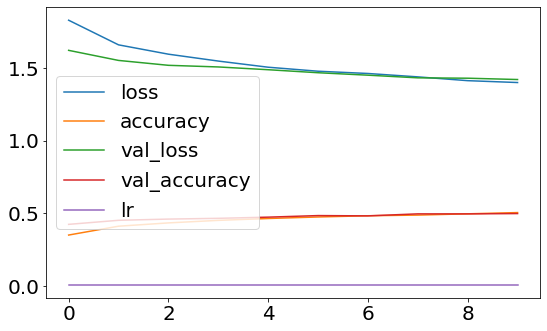

In [83]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve.pdf')
plt.show()

# Testing the Best Model

## Loading the Saved Model

In [84]:
# Implement me
# Load the saved model
model.load_weights(filepath=abspath_curr + '/result/model/model.h5')

## Evaluating the Model

In [85]:
loss, accuracy = model.evaluate(data_test)

625/625 [==============================] - 2s 3ms/step - loss: 1.4084 - accuracy: 0.5032
